In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [3]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9
(x_train, y_train),(x_test, y_test) = mnist.load_data()

This picture is a  5


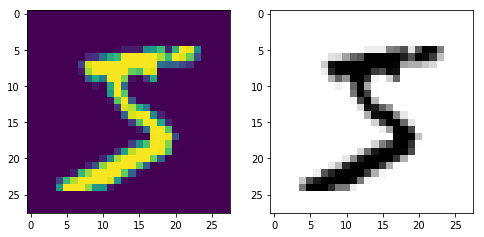

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print("This picture is a ",y_train[0])
fig, (ax1, ax2) = plt.subplots(figsize=(8,9), ncols=2)
ax1.imshow(x_train[0])
ax2.imshow(x_train[0]/255, cmap = plt.cm.binary)
plt.show()

In [5]:
x_train[0].shape


(28, 28)

In [4]:
# Normalization:
# x_train, x_test = x_train / 255.0, x_test / 255.0 # by hand..
x_train = tf.keras.utils.normalize(x_train, axis=1) # Using TensorFlow
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Building a model

In [5]:
# Google default model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Training the model

In [6]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 19s 321us/sample - loss: 0.2568 - acc: 0.9265
Epoch 2/3
60000/60000 [==============================] - 19s 319us/sample - loss: 0.1099 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 19s 318us/sample - loss: 0.0761 - acc: 0.9769


In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.0738 - acc: 0.9779


[0.07382364300973714, 0.9779]

## Prediction

In [8]:
prediction = model.predict([x_test])

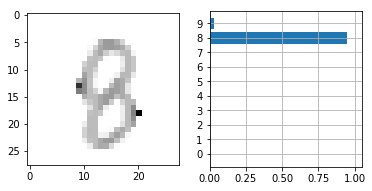

In [10]:
import numpy as np

ps = prediction[177]
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(x_test[177], cmap = plt.cm.binary)
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10));
ax2.set_xticks([0,0.25,0.5,0.75,1.0])
ax2.set_xlim(0, 1.05)
ax2.grid()

## Saving the trained model

In [11]:
model.save('epic_num_reader_model.h5')

## Loading a trained model 

In [12]:
new_model = tf.keras.models.load_model('epic_num_reader_model.h5')

In [13]:
new_predictions = new_model.predict([x_test])

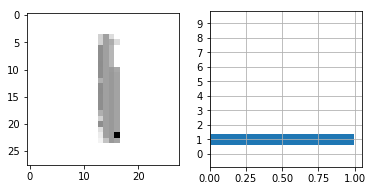

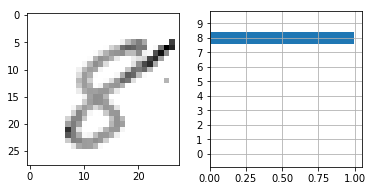

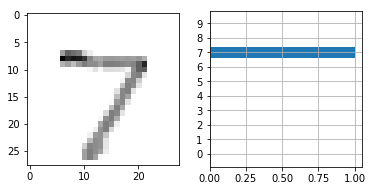

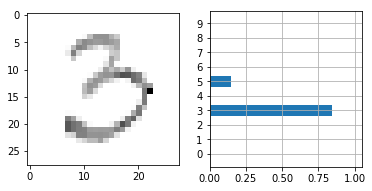

In [14]:
import numpy as np

digitos = np.random.randint(10000, size=4)
digitos = digitos.tolist()
#digitos = [1775, 9637, 1717, 7163]

for digito in digitos:
    ps = new_predictions[digito]
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(x_test[digito], cmap = plt.cm.binary)
    #ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10));
    ax2.set_xticks([0,0.25,0.5,0.75,1.0])
    ax2.set_xlim(0, 1.05)
    ax2.grid()
    